# Seaborn Library-Visualizing linear relationships

http://seaborn.pydata.org/tutorial/regression.html

We many have multiole quantitative variables in our data, and the goal may be to relate those variables to each other. It can be done by showing the joint distribution of two variables, but it may be helpful to use statistical models to estimate a simple relationship between two noisy sets of observations.

The regression plots in *seaborn* aer primarily intended to add a visual guide that helps to emphasize patterns during exploratory data analyses. That is to say that *seaborn* is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, we should use **[statsmodels](http://statsmodels.sourceforge.net/)**. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as important than exploring a dataset through tables of statistics.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes = True)

np.random.seed(sum(map(ord, "regression")))

tips = pd.read_csv("data/tips.csv")

/opt/cloudera/extras/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Functions to Draw Linear Regression Models

Two main functions in *seaborn* are used to visualize a linear relationship as determined through regression. They are

- **`regplot`**
- **`lmplot`**

They're closely related, and share much of their core functionality. It's important to understand the ways they differ, however, s.t. we can quickly choose the correct one for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, *x* and *y*, and then fit the regression mode `y~x` and plot the resulting regression line and a 95% confidence interval for that regression:

/opt/cloudera/extras/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


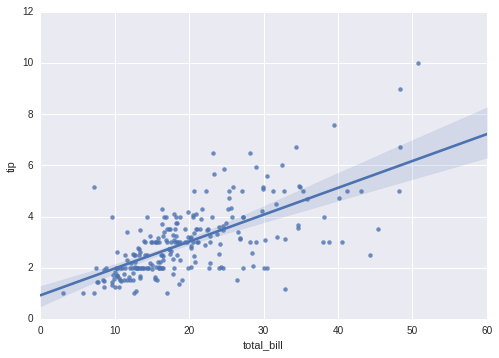

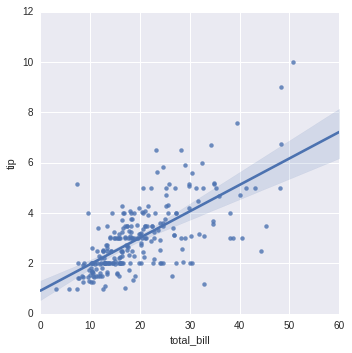

In [2]:
plt.figure(1)
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

plt.figure(2)
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

The plots are identical, except that the figure shapes are different. Another main difference is that **`regplot()`** accepts `x` and `y` variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. In contrast, **`lmplot()`** has `data` as a required parameter and the `x` and `y` variables must be specified as strings. This data format is called "long-form" or "tidy" data. Other than this input flexibility, **`regplot()`** possesses a subset of **`lmplot()`**'s features, so we will demonstrate them using the latter.

it's possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal

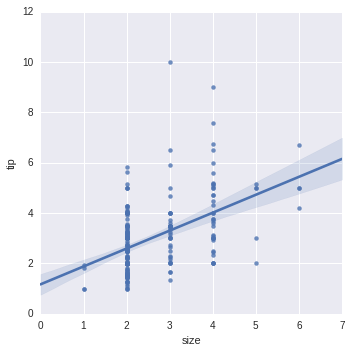

In [3]:
sns.lmplot(x='size', y='tip', data = tips)

One option is to add some random noise ("jitter") to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself.

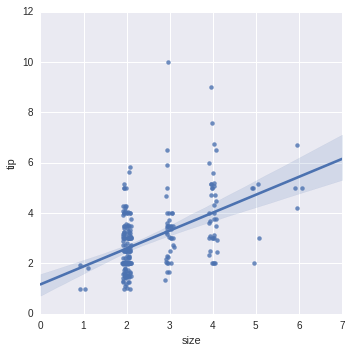

In [4]:
sns.lmplot(x='size', y='tip', data = tips, x_jitter=.1)

A seconod option is to collapse over the observations in each discreta bin to plot an estimate of central tendency along with confidence interval:

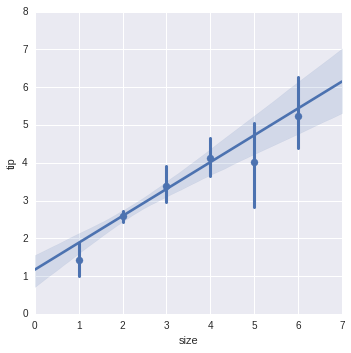

In [5]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## Fitting Different Kinds of Models

The simple linear regression model above is not appropriate for some kinds of datasets, like ***Anscombe's quartet***. Simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences.

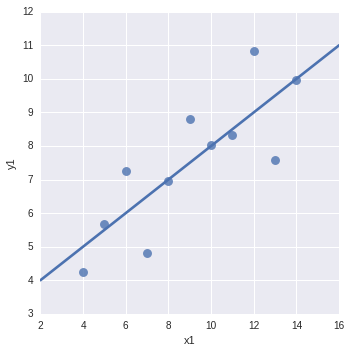

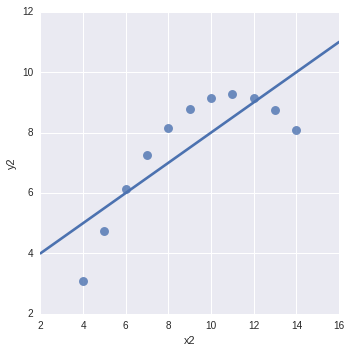

In [6]:
anscombe = pd.read_csv("data/anscombe.csv")

plt.figure(1)
sns.lmplot(x="x1", y="y1", data=anscombe,
           ci=None, scatter_kws={"s": 80})

plt.figure(2)
sns.lmplot(x="x2", y="y2", data=anscombe,
           ci=None, scatter_kws={"s": 80})

In the presence of these kind of higher-order relationships, **`lmplot()`** and **`regplot()`** can fit a polynomial regression model to explore simple kinds of nonlinear trends in the datasets 

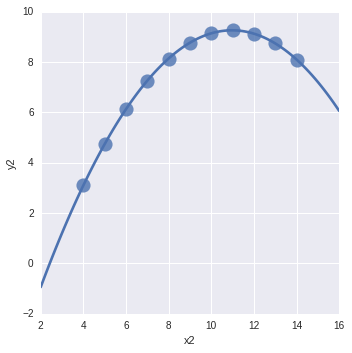

In [7]:
sns.lmplot(x="x2", y="y2", data=anscombe,
           order=2, ci=None, scatter_kws={"s": 200});

A different problem is posed by **outlier** observations that deviate for some reason other than the main relationship underr study.

In the preence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals.

/opt/cloudera/extras/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


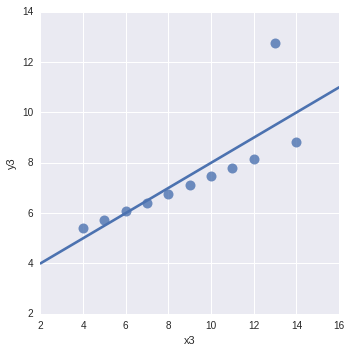

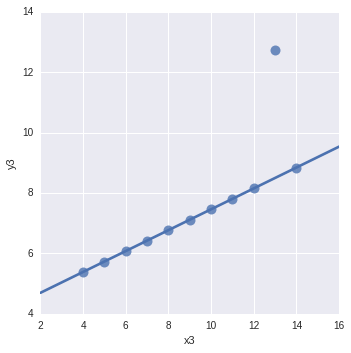

In [8]:
plt.figure(1)
sns.lmplot(x='x3', y='y3', data=anscombe,
          ci = None, scatter_kws={"s":100})

plt.figure(2)
sns.lmplot(x='x3', y='y3', data=anscombe,
          ci = 0.95, scatter_kws={"s":100}, robust = True)

When the `y` variable is binary, simple linear regression also "works" but provides implausible predictions:

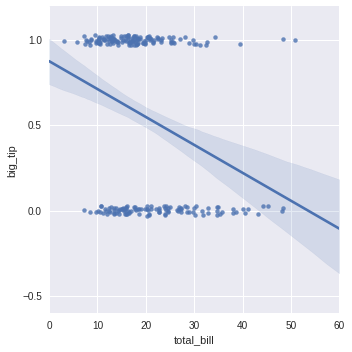

In [9]:
tips['big_tip'] = (tips.tip / tips.total_bill) > .15

sns.lmplot(x="total_bill", y="big_tip", data = tips,
          y_jitter = .03)

The solution should be to fit a logistic regression, such that the regression line shows the estimated probability of `y=1` for a given value of `x`:

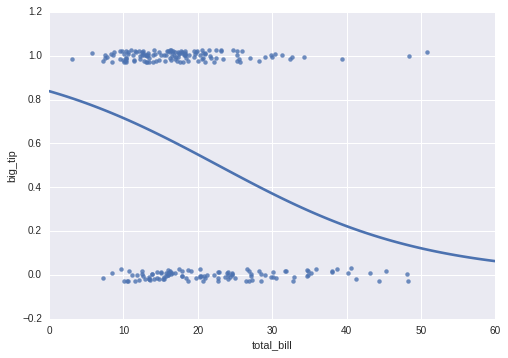

In [10]:
sns.regplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03, ci = None)

# "sns.lmplot() will work too"

We need to note that logistic regression estimate is considerably more computationally intensive (this is also true of robust regression) than simple regression, and as the confidence interval around the regression line is computed using ***bootstrap*** procedures, we may wish to turn this off for faster iteration (using `ci=None`)

An altogether different approach is to fit a *nonparametric regression* using a [lowess smoother (Local Regression)](https://en.wikipedia.org/wiki/Local_regression). This approach has the fewest assumptions, although it's computationally intensive and so currently confidence intervals are not computed at all:

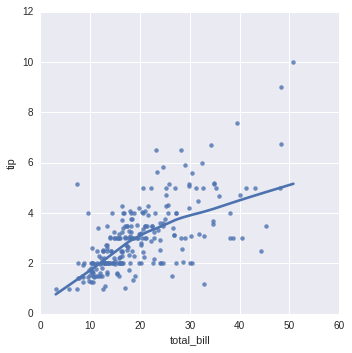

In [11]:
sns.lmplot(x="total_bill", y = "tip", data=tips, lowess=True)

The **`residplot()`** function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. If fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around `y=0`; if there is structure in the residuals, it suggests that simple linear regression is not appropriate.

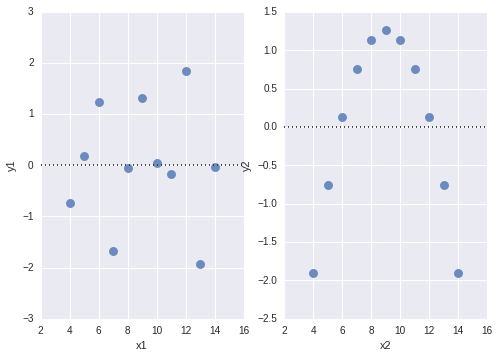

In [12]:
plt.subplot(121)
sns.residplot(x='x1', y='y1', data=anscombe, scatter_kws={"s":80})

plt.subplot(122)
sns.residplot(x='x2', y='y2', data=anscombe, scatter_kws={"s":80})

## Conditioning on Other Variables

The plots above are mainly about relationship between a pair of variables. Often, however, a more interesting question is "*how does the relationship between these two variables change as a function of a third variable?*". This is where the difference between **`regplot()`** and **`lmplot()`** appears. While **`regplot()`** always shows a single relationship, **`lmplot()`** combines **`regplot()`** with **`FacetGrid`** to provide an easy interface to show a linear regression on "faceted" plots that allow you to explore interactions with up to three additional categorical variables.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

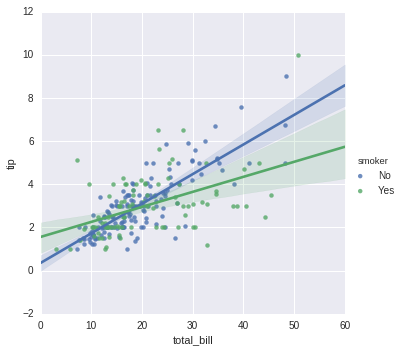

In [13]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

In addition to color, it's also possible to use different scatterplot markers to make plots the reproduce to black and white better. We also have full control over the colors used:

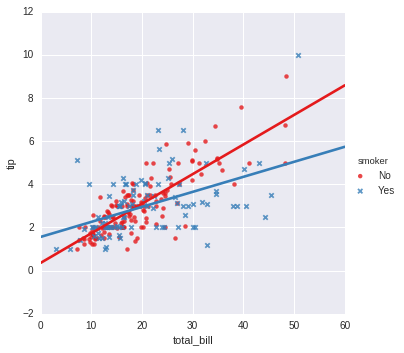

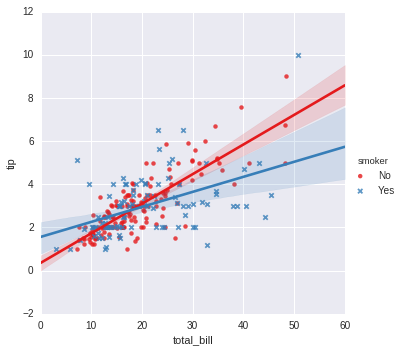

In [14]:
plt.figure(1)
sns.lmplot(x="total_bill", y="tip", hue="smoker", data = tips, 
          markers=["o", "x"], palette = "Set1", ci=None)

plt.figure(2)
sns.lmplot(x="total_bill", y="tip", hue="smoker", data = tips, 
          markers=["o", "x"], palette = "Set1")

To add another variable, we can draw multiple "facets" which each level of the variable appearing in the rows or columns of the grid.

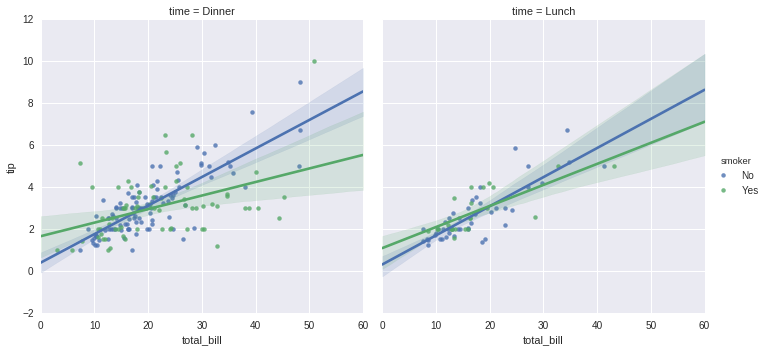

In [15]:
sns.lmplot(x="total_bill", y = "tip", data = tips, hue = "smoker", col="time")

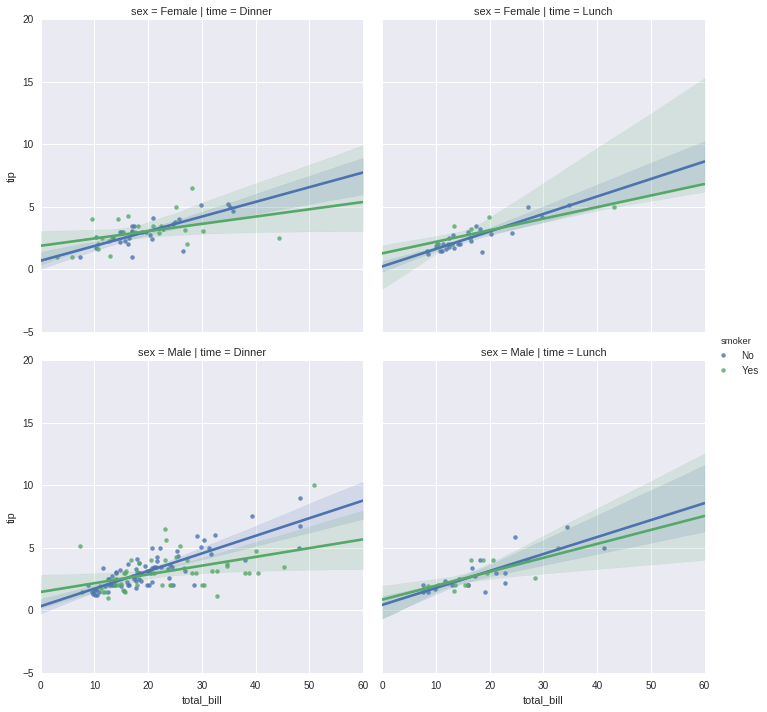

In [16]:
sns.lmplot(x="total_bill", y = "tip", data = tips, 
           hue = "smoker", col="time", row = "sex")

## Controlling the Size & Shape of the Plot

The default plots made by **`regplot()`** and **`lmplot()`** look the same but on axes that have a different size and shape. This is because func:*regplot* is an "axes-level" function draws onto a specific axes. This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. If no axes if provided, it simply use the "currently active" axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself.

Axes(0.125,0.125;0.775x0.775)


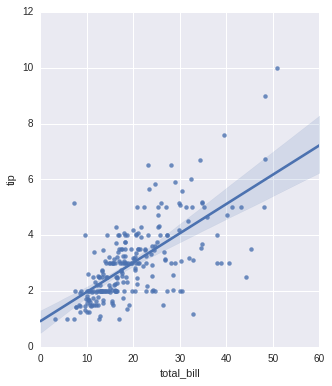

In [17]:
f, ax = plt.subplots(figsize=(5,6))
print ax
sns.regplot(x=tips.total_bill, y=tips.tip, data = tips, ax=ax)

In contrast, the size and shape of the **`lmplot()`** figure is conotrolled through the **`FacetGrid`** interface using the `size` and `aspect` parameters, which apply to each *facet* in the plot, not to the overall figure itself.

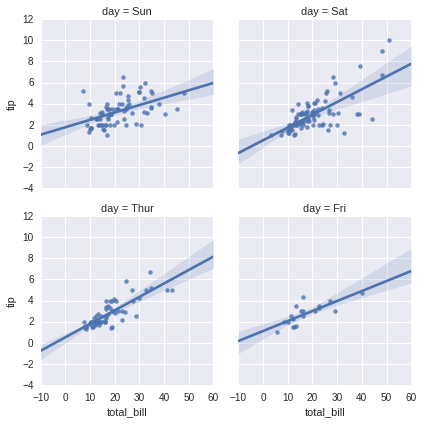

In [18]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3)

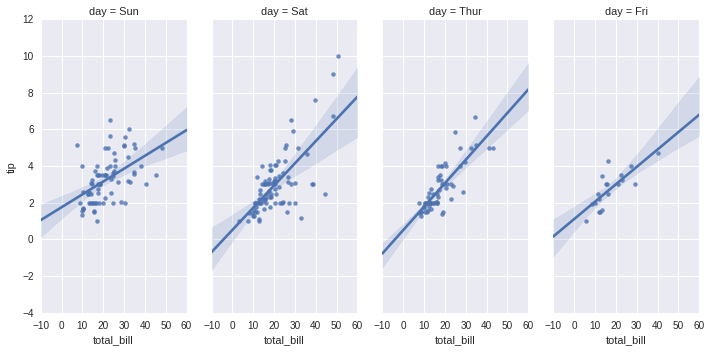

In [19]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5)

## Plottingg A Regression in Other Contexts

A few other seaborn functions use `regplot()` in the context of a larger, more complex plot. The first is the `jointplot()`. In addition to the plot styles previously discussed, **`jointplot()`** can use **`regplot()`** to show the linear regression fit on the joint axes by passing **`kind="reg"`**:

/opt/cloudera/extras/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/opt/cloudera/extras/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


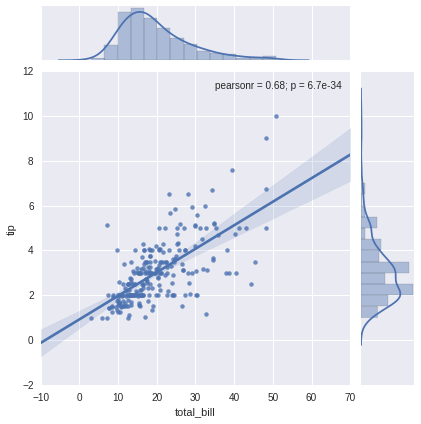

In [20]:
sns.jointplot(x="total_bill", y="tip", data = tips, kind="reg")

Using **`pairplot()`** function with **`kind="reg"`** combines **`regplot()`** and **`PairGrid`** to show the linear relationship between variables in a dataset. Take care to note how this is different from **`lmplot()`**. In the figure above, the two axes don't show the same relationship conditioned on two levels of a third variable; rather, **`PairGrid()`** is used to show multiple relationships between different pairings of the variables in a dataset:

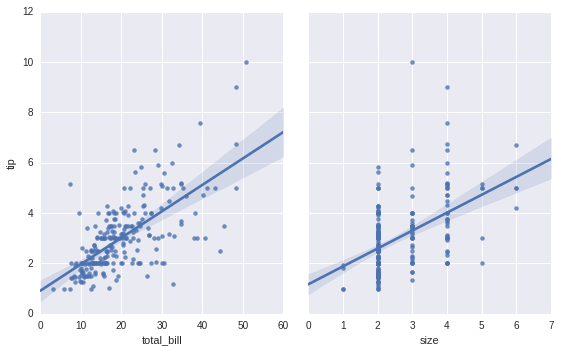

In [21]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=['tip'],
            size=5, aspect=.8, kind="reg")

Like **`lmplot()`**, but unlike **`jointplot()`**, conditioning on an additional categorical variable is built into **`pairplot()`** using the **`hue`** parameter

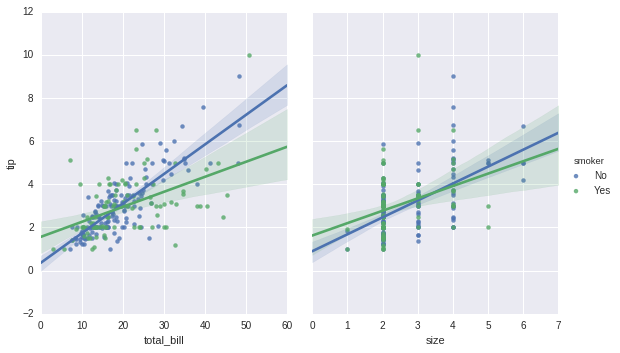

In [22]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg")